In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Load the heart failure dataset into a pandas DataFrame
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

# Print the shape of the dataset (number of rows and columns)
print("Shape:", df.shape)

# Display the column names in the dataset
print("\nColumns:", df.columns.tolist())

# Show data types, non-null counts, and memory usage for each column
df.info()

# Generate summary statistics for all numerical columns
df.describe()

# Display the first 5 rows of the dataset to get a quick preview
df.head()


Shape: (918, 12)

Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Target distribution:
 HeartDisease
1    508
0    410
Name: count, dtype: int64


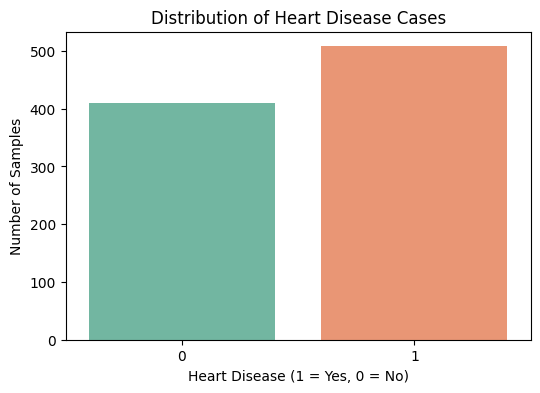

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples for each class in the target variable
heart_disease_counts = df['HeartDisease'].value_counts()

# Print raw counts
print("Target distribution:\n", heart_disease_counts)

# Plot the class distribution as a bar chart
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='HeartDisease', palette='Set2')

# Add title and labels
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Number of Samples')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

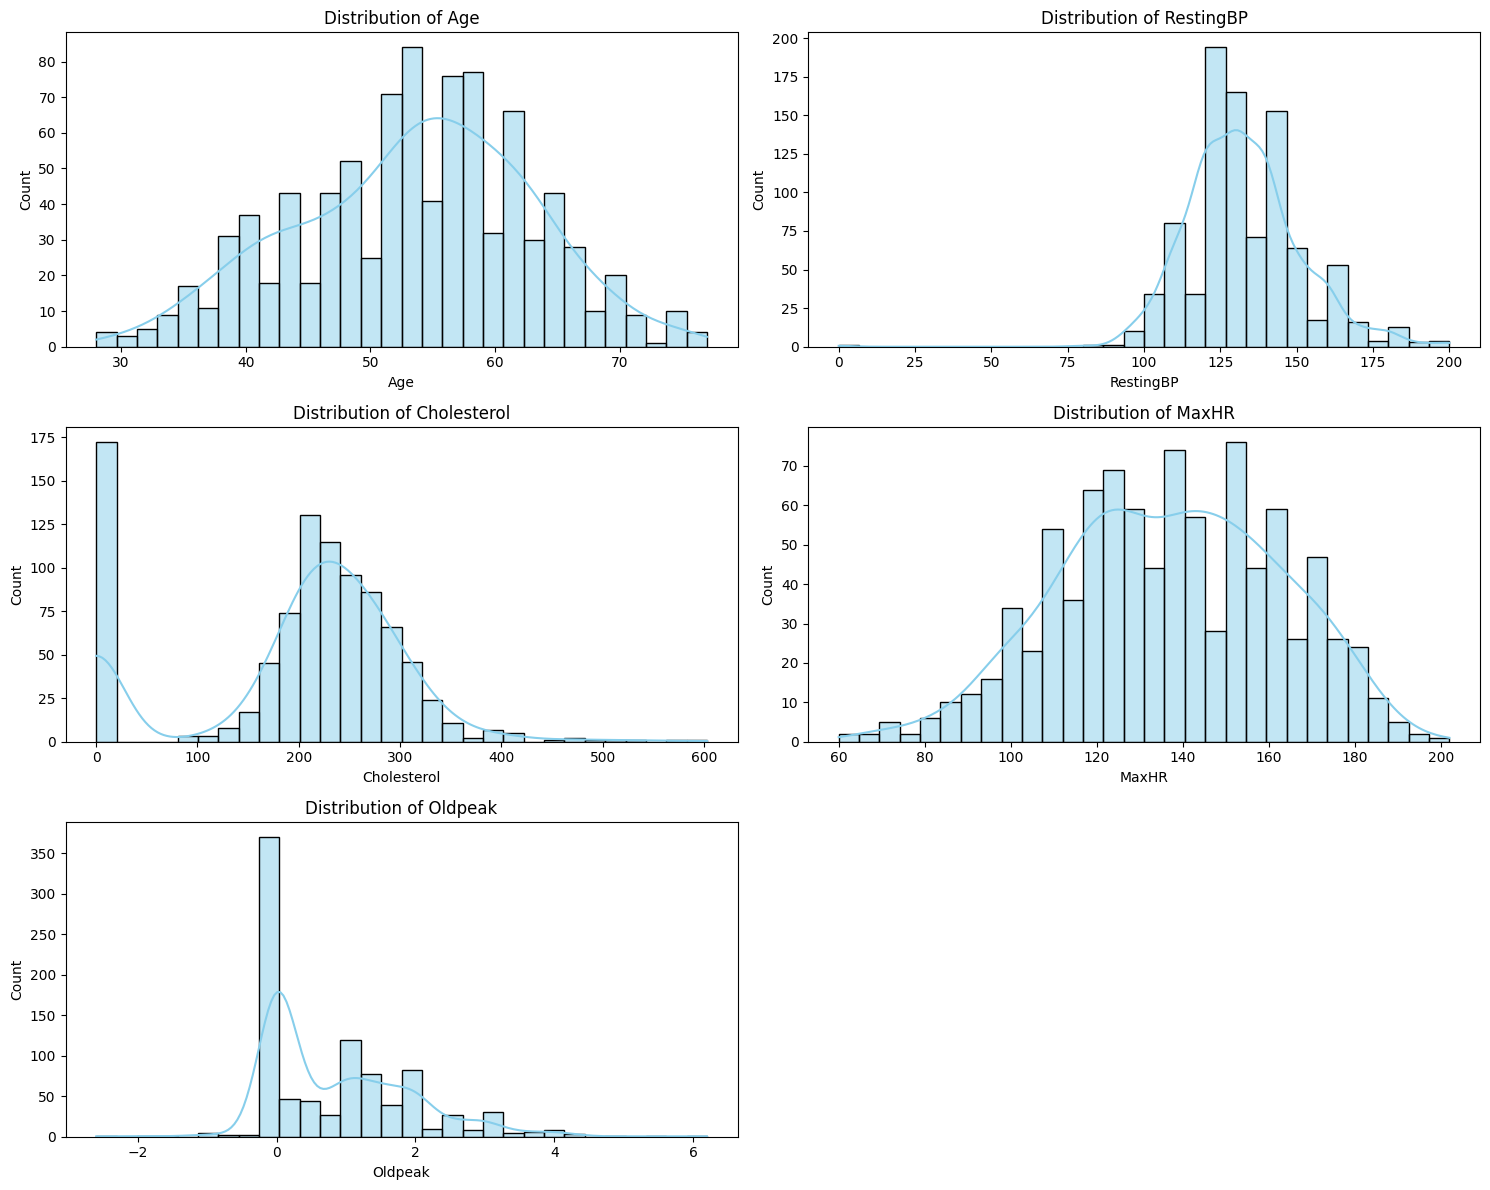

In [4]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Plot distributions of numeric features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df, x=feature, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

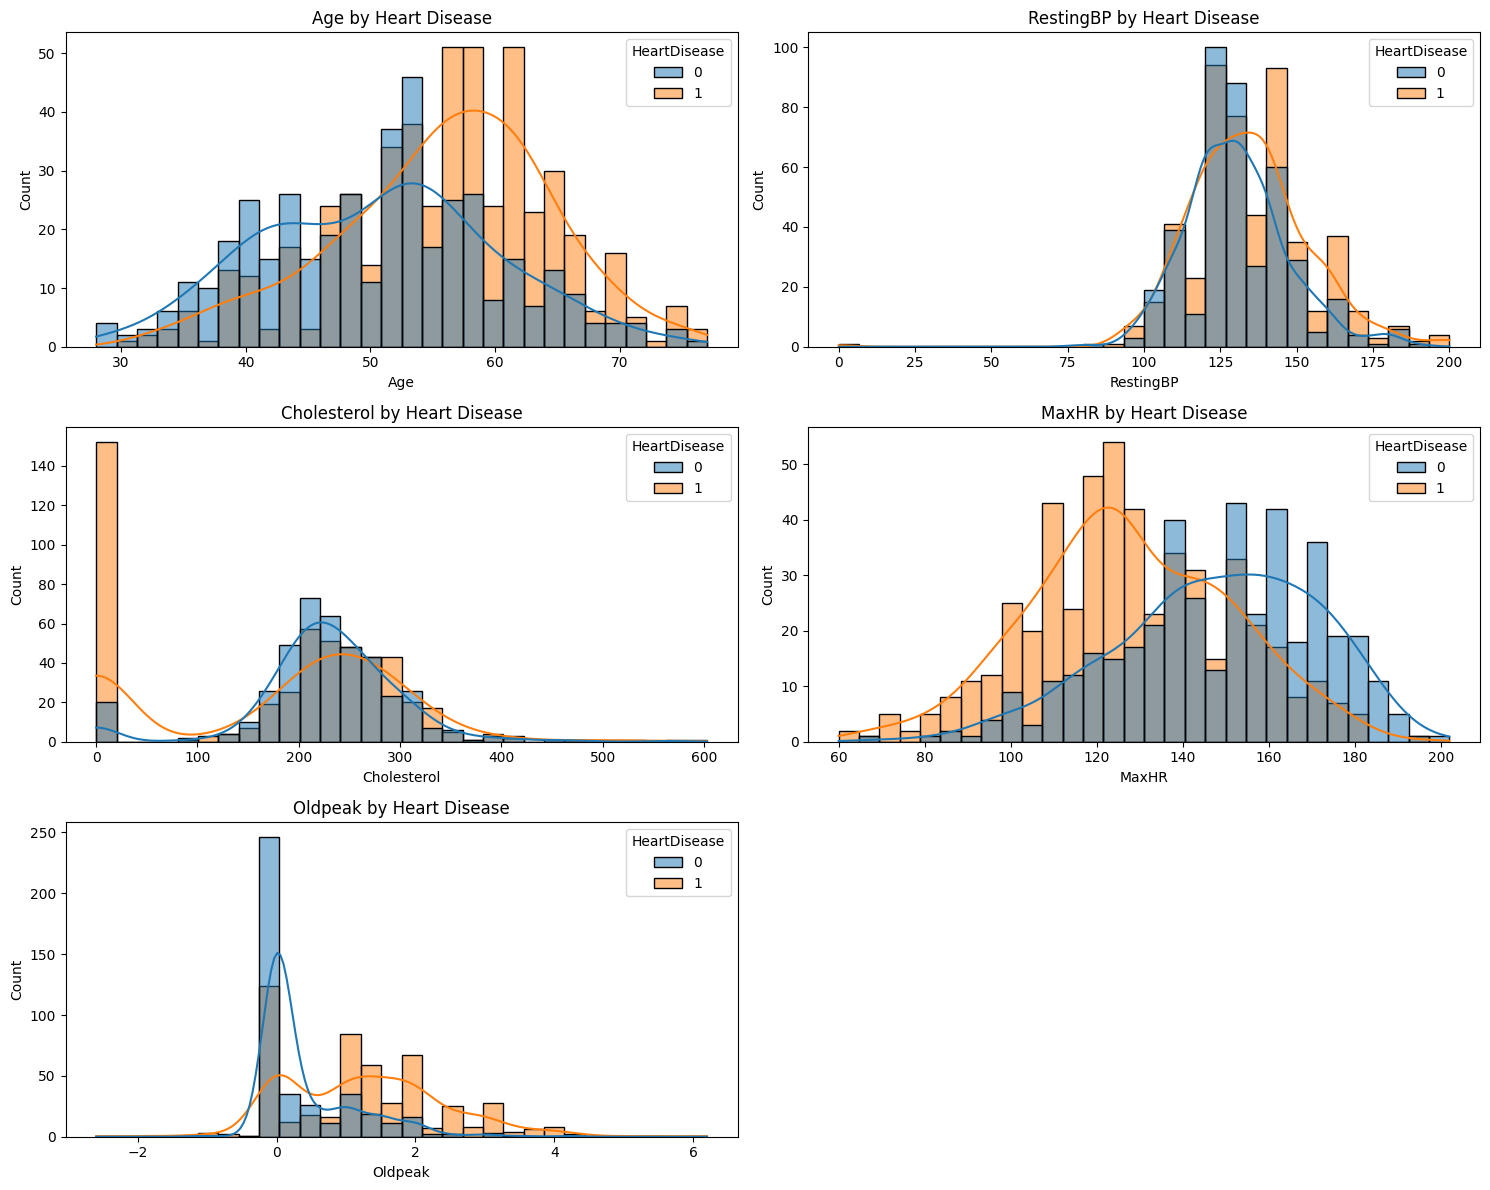

In [5]:
# Plot distributions split by target class
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, bins=30)
    plt.title(f'{feature} by Heart Disease')
plt.tight_layout()
plt.show()



In [6]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, 
    columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
    drop_first=True  # Avoid dummy variable trap
)

# Preview result
df_encoded.head()


# List of numeric columns to scale
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Standardize each column (z-score normalization)
for col in numeric_cols:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    df_encoded[col] = (df_encoded[col] - mean) / std


# Separate X (features) and y (labels)
X = df_encoded.drop('HeartDisease', axis=1).values  # Convert to NumPy array
y = df_encoded['HeartDisease'].values.reshape(-1, 1)  # Make y shape (m, 1)


In [7]:
from sklearn.model_selection import train_test_split

# 1. Split into 60% train and 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 2. Split temp into 50/50 → 20% val, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Check the shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (550, 15) (550, 1)
Validation set: (184, 15) (184, 1)
Test set: (184, 15) (184, 1)


In [8]:
 import numpy as np

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_weights(n_features):
    w = np.zeros((n_features, 1))  # shape: (15, 1)
    b = 0
    return w, b

# Forward and backward propagation
def propagate(X, y, w, b):
    m = X.shape[0]  # number of examples

    # Forward pass
    z = np.dot(X, w) + b        # shape: (m, 1)
    y_hat = sigmoid(z)          # predictions
    loss = - (y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))
    cost = np.sum(loss) / m     # average loss (binary cross-entropy)

    # Backward pass (gradients)
    dz = y_hat - y              # shape: (m, 1)
    dw = np.dot(X.T, dz) / m    # shape: (n, 1)
    db = np.sum(dz) / m         # scalar

    return cost, dw, db


In [9]:
# Training function (gradient descent) 

def train_logistic_regression(X, y, learning_rate=0.01, num_epochs=1000, print_loss=True):
    n_features = X.shape[1]
    w, b = initialize_weights(n_features)

    cost_history = []

    for epoch in range(num_epochs):
        cost, dw, db = propagate(X, y, w, b)

        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db

        cost_history.append(cost)

        # Print cost every 100 epochs
        if print_loss and epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}")

    return w, b, cost_history

# Prediction function
def predict(X, w, b, threshold=0.5):
    y_prob = sigmoid(np.dot(X, w) + b)
    y_pred = (y_prob >= threshold).astype(int)
    return y_pred


In [10]:
# Ensure input data is of type float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)



# Train the model

w, b, losses = train_logistic_regression(X_train, y_train, learning_rate=0.1, num_epochs=1000)


Epoch 0: Cost = 0.6931
Epoch 100: Cost = 0.3913
Epoch 200: Cost = 0.3647
Epoch 300: Cost = 0.3529
Epoch 400: Cost = 0.3458
Epoch 500: Cost = 0.3411
Epoch 600: Cost = 0.3377
Epoch 700: Cost = 0.3352
Epoch 800: Cost = 0.3332
Epoch 900: Cost = 0.3317


In [11]:
# Predict labels (0 or 1) using learned weights and bias
y_val_pred = predict(X_val, w, b)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Flatten y_val for compatibility
y_val_flat = y_val.flatten()

# Evaluate the model
acc = accuracy_score(y_val_flat, y_val_pred)
prec = precision_score(y_val_flat, y_val_pred)
rec = recall_score(y_val_flat, y_val_pred)
f1 = f1_score(y_val_flat, y_val_pred)
cm = confusion_matrix(y_val_flat, y_val_pred)

# Print metrics
print(f"Validation Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)



Validation Accuracy: 0.8859
Precision: 0.9175
Recall: 0.8725
F1 Score: 0.8945

Confusion Matrix:
[[74  8]
 [13 89]]


In [12]:
# Predict on test set
y_test_pred = predict(X_test, w, b)
y_test_flat = y_test.flatten()

# Evaluate on test set
acc_test = accuracy_score(y_test_flat, y_test_pred)
prec_test = precision_score(y_test_flat, y_test_pred)
rec_test = recall_score(y_test_flat, y_test_pred)
f1_test = f1_score(y_test_flat, y_test_pred)
cm_test = confusion_matrix(y_test_flat, y_test_pred)

# Print results
print(f"Test Accuracy: {acc_test:.4f}")
print(f"Precision: {prec_test:.4f}")
print(f"Recall: {rec_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print("\nConfusion Matrix:")
print(cm_test)


Test Accuracy: 0.8641
Precision: 0.8667
Recall: 0.8922
F1 Score: 0.8792

Confusion Matrix:
[[68 14]
 [11 91]]


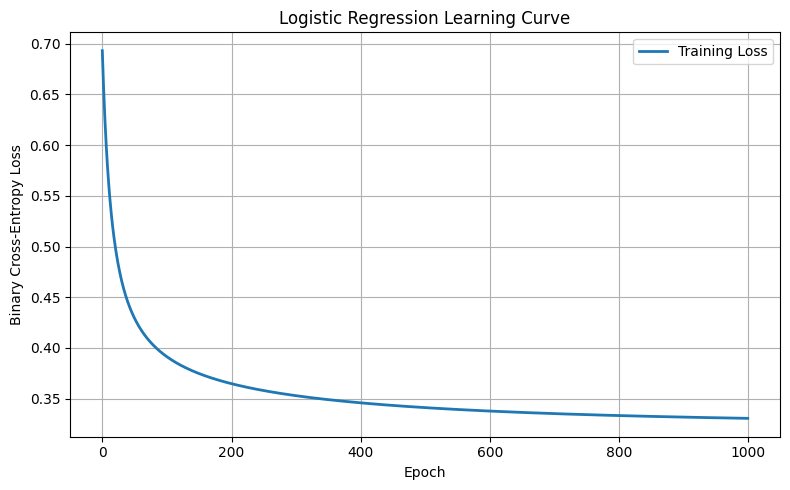

In [13]:
import matplotlib.pyplot as plt

# Plot the loss values recorded during training
plt.figure(figsize=(8,5))
plt.plot(losses, label='Training Loss', linewidth=2)

# Add labels and title
plt.title("Logistic Regression Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import numpy as np


# 1. Simulate new patient data (as a dictionary)

new_patient = {
    'Age': [54],
    'Sex': ['M'],
    'ChestPainType': ['ASY'],
    'RestingBP': [150],
    'Cholesterol': [250],
    'FastingBS': [0],
    'RestingECG': ['Normal'],
    'MaxHR': [140],
    'ExerciseAngina': ['Y'],
    'Oldpeak': [1.5],
    'ST_Slope': ['Flat']
}

# Convert to a single-row DataFrame
df_new = pd.DataFrame(new_patient)


# 2. One-hot encode the same categorical columns

df_encoded_new = pd.get_dummies(df_new, 
    columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
    drop_first=True  # To match how training data was encoded
)


# 3. Reindex to match training features exactly

# Drop 'HeartDisease' from df_encoded if needed
expected_cols = df_encoded.columns.drop('HeartDisease')

# Add missing columns (set to 0), remove extras (ensure same order)
df_encoded_new = df_encoded_new.reindex(columns=expected_cols, fill_value=0)


# 4. Standardize numeric features using training stats


# List of numeric columns you scaled during training
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Compute and store training means and stds (if you haven't already)
feature_means = {}
feature_stds = {}
for col in numeric_cols:
    feature_means[col] = df_encoded[col].mean()
    feature_stds[col] = df_encoded[col].std()

# Apply z-score normalization to new patient data using training stats
for col in numeric_cols:
    df_encoded_new[col] = (df_encoded_new[col] - feature_means[col]) / feature_stds[col]


# 5. Convert to NumPy and make prediction

X_new = df_encoded_new.values.astype(np.float32)
y_pred_new = predict(X_new, w, b)  # use your previously trained weights


# 6. Print prediction result

print("Prediction:", "Heart Disease" if y_pred_new[0][0] == 1 else "No Heart Disease")


Prediction: No Heart Disease
